In [11]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import csep
from csep.utils import time_utils
from matplotlib.lines import Line2D
from csep.core.forecasts import GriddedForecast
from cartopy.io import img_tiles
from csep.core.regions import CartesianGrid2D
import time
import warnings
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from csep.utils.readers import mapping_GEAR1, read_GEAR1_format
warnings.filterwarnings('ignore')

In [32]:
# Load data
area_fnameW = '../data/area.dat'
GEAR1_fnameW = '../data/GEAR1.dat'
fname_NZ = '../data/grid_file.csv'

mapping_GEAR1(GEAR1_fnameW, area_fnameW, fname_NZ)



Reading data...
The output files have been stored successfully.


In [35]:
input1 = 'GEAR1_region.dat'
input2 = 'areas_region.dat'


mw_min = 4.95
mw_max = 8.95
dmw = 0.1
mws = np.arange(mw_min, mw_max+dmw/2, dmw)

start_date = time_utils.strptime_to_utc_datetime('2014-01-01 00:00:00.0')
end_date = time_utils.strptime_to_utc_datetime('2022-01-01 00:00:00.0')
duration = (end_date - start_date) # in days
duration =  round(duration.days / 365.25,2) # in years
ofp = 5.0 # original forecast period (in years)
factor = duration / ofp # scaling factor

# GEAR1NZ_f = GriddedForecast.from_custom(read_GEAR1_format, name='GEAR1', func_args=(input1, input2, mws)).scale(factor)

## Plotting global and regional seismicity forecasts on a map

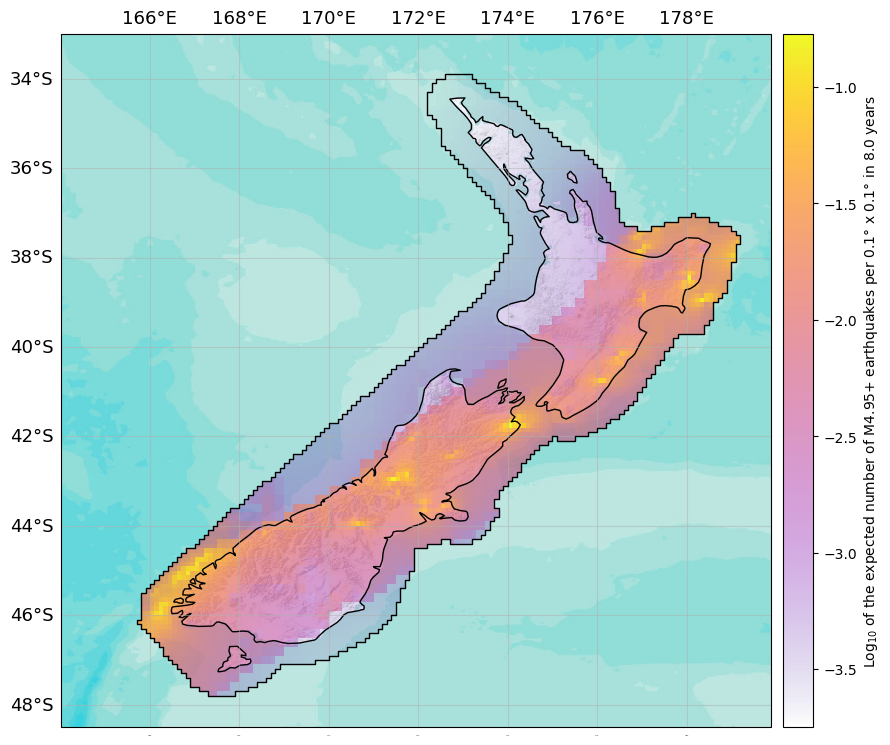

In [22]:

fig = plt.figure(figsize=(12,9))

ax_GEAR1NZ = fig.add_subplot(111, projection=ccrs.PlateCarree())
gl = ax_GEAR1NZ.gridlines()
gl.xlines = False
gl.ylines = False
gl.top_labels = True 
gl.bottom_labels = False 
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
# gl.xlocator = mticker.FixedLocator([166,170, 174, 178])
gl.xformatter = LONGITUDE_FORMATTER
# gl.ylocator = mticker.FixedLocator([-35, -38, -41, -44, -47])
gl.yformatter = LATITUDE_FORMATTER


args_dict = {
            'title': None,
             'grid_labels': True,
             'borders': True,
             'xlabels_top' : True,
             'feature_lw': 0.5,
             'basemap': 'ESRI_terrain',
             'cmap': 'plasma',
             'vmin': -4.5,
             'vmax': -0.5,
             'alpha_exp': 0.8,
             'bbox_inches' : 'tight',
             'tight_layout': True,
             'pad_inches':0,
             'filename' : "../output/figure2",
             'clabel' : f'Log$_{{10}}$ of the expected number of M{GEAR1NZ_f.min_magnitude}+ earthquakes per 0.1° x 0.1° in {duration} years'
            }

new_ax = GEAR1NZ_f.plot(extent=[164, 179.9,-48.5, -33],
                   show=True,
                   plot_args=args_dict,
                   ax = ax_GEAR1NZ)
